In [ ]:
#미완성입니다!!! 저장하고 다시 해보려고 저장하는 것!!!!!!!

In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/recruit-restaurant-visitor-forecasting/air_reserve.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/hpg_store_info.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/hpg_reserve.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/sample_submission.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/air_visit_data.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/air_store_info.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/date_info.csv.zip
/kaggle/input/recruit-restaurant-visitor-forecasting/store_id_relation.csv.zip


In [36]:
#data load
air_reserve = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/air_reserve.csv.zip')
hpg_store_info = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/hpg_store_info.csv.zip')
hpg_reserve = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/hpg_reserve.csv.zip')
air_visit_data = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/air_visit_data.csv.zip')
air_store_info = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/air_store_info.csv.zip')
date_info = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/date_info.csv.zip')
store_id_relation = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/store_id_relation.csv.zip')
sample_sub = pd.read_csv('/kaggle/input/recruit-restaurant-visitor-forecasting/sample_submission.csv.zip')

In [37]:
#data check

print(air_store_info.shape)
air_store_info.head()

(829, 5)


,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


In [38]:
print(air_reserve.shape)
air_reserve.head()

(92378, 4)


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [39]:
#air로 예약가능한 식당 수
air_reserve.air_store_id.nunique()

314

In [40]:
print(air_visit_data.shape)
air_visit_data.head()

(252108, 3)


,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [41]:
#air_visit_data의 모든 store id가 air_sotre의 store id에 있는지 확인
air_visit_data.air_store_id.isin(air_store_info.air_store_id).all()

True

In [42]:
print(hpg_store_info.shape)
hpg_store_info.head()

(4690, 5)


,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [43]:
print(hpg_reserve.shape)
hpg_reserve.head()

(2000320, 4)


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [44]:
#hpg로 예약 가능한 식당 수
hpg_reserve.hpg_store_id.nunique()

13325

In [45]:
print(date_info.shape)
date_info.head()

(517, 3)


,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [46]:
print(store_id_relation.shape)
store_id_relation.head()

(150, 2)


,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


In [47]:
#id, hpg 둘 다 사용가능한 식당 수 
store_id_relation.air_store_id.nunique()

150

In [48]:
#target 확인
print(sample_sub.shape)
sample_sub

(32019, 2)


,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0
...,...,...
32014,air_fff68b929994bfbd_2017-05-27,0
32015,air_fff68b929994bfbd_2017-05-28,0
32016,air_fff68b929994bfbd_2017-05-29,0
32017,air_fff68b929994bfbd_2017-05-30,0


In [49]:
#target에서 id에 있는 air_store_id, date 분리

id_split = sample_sub['id'].str.split('_', expand=True)
id_split.columns = ['source', 'store_id', 'visit_date']

sample_sub = pd.concat([sample_sub, id_split], axis=1)

sample_sub['air_store_id']=sample_sub['source'].str.cat(sample_sub['store_id'], sep='_')
sample_sub = sample_sub[['id', 'air_store_id', 'visit_date', 'visitors']]
sample_sub['visit_date'] = pd.to_datetime(sample_sub['visit_date'])

sample_sub.head()

,id,air_store_id,visit_date,visitors
0,air_00a91d42b08b08d9_2017-04-23,air_00a91d42b08b08d9,2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,air_00a91d42b08b08d9,2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,air_00a91d42b08b08d9,2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,air_00a91d42b08b08d9,2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,air_00a91d42b08b08d9,2017-04-27,0


In [50]:
#tartget에 있는 stores 수
sample_sub.air_store_id.nunique()

821

In [51]:
air_visit_data['id'] = air_visit_data['air_store_id'].str.cat(air_visit_data['visit_date'].astype(str), sep='_')

In [52]:
#train dataset 틀(? 생성
train_dt = pd.concat([air_visit_data, sample_sub], axis=0, keys=['past','future'], names=['dataset']).reset_index(level='dataset').reset_index(drop=True)

In [53]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284127 entries, 0 to 284126
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   dataset       284127 non-null  object
 1   air_store_id  284127 non-null  object
 2   visit_date    284127 non-null  object
 3   visitors      284127 non-null  int64 
 4   id            284127 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.8+ MB


In [54]:
train_dt

,dataset,air_store_id,visit_date,visitors,id
0,past,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13
1,past,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14
2,past,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15
3,past,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16
4,past,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18
...,...,...,...,...,...
284122,future,air_fff68b929994bfbd,2017-05-27 00:00:00,0,air_fff68b929994bfbd_2017-05-27
284123,future,air_fff68b929994bfbd,2017-05-28 00:00:00,0,air_fff68b929994bfbd_2017-05-28
284124,future,air_fff68b929994bfbd,2017-05-29 00:00:00,0,air_fff68b929994bfbd_2017-05-29
284125,future,air_fff68b929994bfbd,2017-05-30 00:00:00,0,air_fff68b929994bfbd_2017-05-30


In [55]:
#air, hpg store info, reserve 병합

#target의 store id가 air_store_id에 있는지 확인
sample_sub.air_store_id.isin(air_store_info.air_store_id).all()

True

In [56]:
stores_info = pd.merge(air_store_info, store_id_relation, how = 'left', on = 'air_store_id')
print(stores_info.shape)
stores_info.head()

(829, 6)


,air_store_id,air_genre_name,air_area_name,latitude,longitude,hpg_store_id
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,hpg_9b38b9e13da6da27
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN


In [57]:
stores_info = pd.merge(stores_info, hpg_store_info, how='left', on='hpg_store_id', suffixes=['_air','_hpg'])
print(stores_info.shape)
stores_info.head()

(829, 10)


,air_store_id,air_genre_name,air_area_name,latitude_air,longitude_air,hpg_store_id,hpg_genre_name,hpg_area_name,latitude_hpg,longitude_hpg
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,hpg_9b38b9e13da6da27,NaN,NaN,NaN,NaN
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197853,NaN,NaN,NaN,NaN,NaN
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,NaN,NaN,NaN,NaN,NaN


In [58]:
#reserve data 병합
hpg_reserve = pd.merge(hpg_reserve, store_id_relation, on='hpg_store_id')[air_reserve.columns]

In [59]:
hpg_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_db80363d35f10926,2016-01-01 19:00:00,2016-01-01 15:00:00,4
1,air_db80363d35f10926,2016-01-02 19:00:00,2016-01-02 14:00:00,2
2,air_db80363d35f10926,2016-01-03 18:00:00,2016-01-02 20:00:00,6
3,air_db80363d35f10926,2016-01-06 20:00:00,2016-01-04 22:00:00,3
4,air_db80363d35f10926,2016-01-11 18:00:00,2016-01-11 14:00:00,2


In [60]:
reserve_info = pd.concat([air_reserve, hpg_reserve], axis=0)
print(reserve_info.shape)
reserve_info.head()

(120561, 4)


,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [61]:
#visit data 병합
air_visit_data.visit_date = pd.to_datetime(air_visit_data.visit_date)
air_visit_data.head()

,air_store_id,visit_date,visitors,id
0,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13
1,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14
2,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15
3,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16
4,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18


In [62]:
#day-to-day visitors
visitors_by_date = air_visit_data.groupby('visit_date').sum()
visitors_by_date.head()

,visitors
visit_date,
2016-01-01,1033
2016-01-02,1764
2016-01-03,2368
2016-01-04,3326
2016-01-05,3927


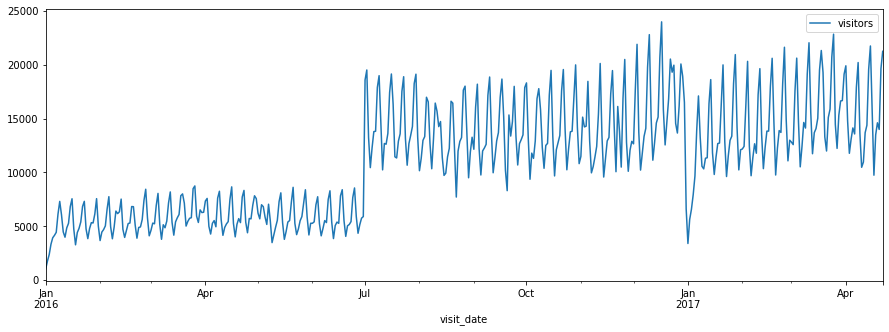

In [63]:
ax = visitors_by_date.plot(figsize=[15,5])

In [64]:
#each day of week visitors
air_visit_data['weekday'] = air_visit_data.visit_date.dt.weekday

In [65]:
air_visit_data.head()

,air_store_id,visit_date,visitors,id,weekday
0,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13,2
1,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14,3
2,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15,4
3,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16,5
4,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18,0


In [66]:
visitors_by_weekday = air_visit_data.groupby('weekday')['visitors'].sum()

Text(0.5, 0, 'weekday (monday=, sunday=6)')

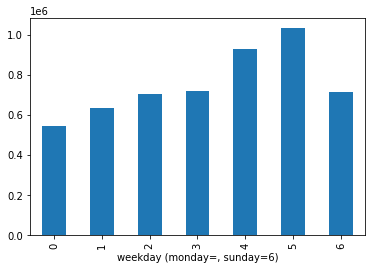

In [67]:
ax = visitors_by_weekday.plot.bar()
ax.set_xlabel('weekday (monday=, sunday=6)')

<AxesSubplot:>

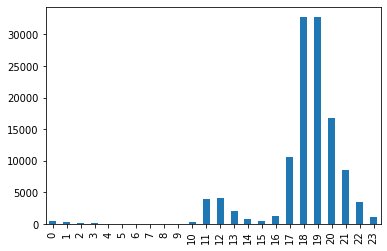

In [68]:
#reserve visitors by time(24h)

reserve_info.visit_datetime = pd.to_datetime(reserve_info.visit_datetime)

reserve_info.visit_datetime.dt.hour.value_counts().sort_index().plot.bar()

In [ ]:
### 위 내용까지가 데이터 시각화 및 분석, 관계 나타낸 것 ###

In [ ]:
##### --------------------- #####

In [ ]:
#Feature_Engineering

In [72]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284127 entries, 0 to 284126
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   dataset       284127 non-null  object
 1   air_store_id  284127 non-null  object
 2   visit_date    284127 non-null  object
 3   visitors      284127 non-null  int64 
 4   id            284127 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.8+ MB


In [73]:
train_dt.visit_date = pd.to_datetime(train_dt.visit_date)

In [76]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284127 entries, 0 to 284126
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   dataset       284127 non-null  object        
 1   air_store_id  284127 non-null  object        
 2   visit_date    284127 non-null  datetime64[ns]
 3   visitors      284127 non-null  int64         
 4   id            284127 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 10.8+ MB


In [77]:
train_dt

,dataset,air_store_id,visit_date,visitors,id
0,past,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13
1,past,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14
2,past,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15
3,past,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16
4,past,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18
...,...,...,...,...,...
284122,future,air_fff68b929994bfbd,2017-05-27,0,air_fff68b929994bfbd_2017-05-27
284123,future,air_fff68b929994bfbd,2017-05-28,0,air_fff68b929994bfbd_2017-05-28
284124,future,air_fff68b929994bfbd,2017-05-29,0,air_fff68b929994bfbd_2017-05-29
284125,future,air_fff68b929994bfbd,2017-05-30,0,air_fff68b929994bfbd_2017-05-30


In [78]:
#about Date features

train_dt['weekday'] = train_dt.visit_date.dt.dayofweek
train_dt['year'] = train_dt.visit_date.dt.year
train_dt['month'] = train_dt.visit_date.dt.month
train_dt['day_of_year'] = train_dt.visit_date.dt.dayofyear
train_dt['days_in_month'] = train_dt.visit_date.dt.days_in_month
train_dt['week_of_year'] = train_dt.visit_date.dt.weekofyear
train_dt['is_month_end'] = train_dt.visit_date.dt.is_month_end

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [80]:
train_dt.head()

,dataset,air_store_id,visit_date,visitors,id,weekday,year,month,day_of_year,days_in_month,week_of_year,is_month_end
0,past,air_ba937bf13d40fb24,2016-01-13,25,air_ba937bf13d40fb24_2016-01-13,2,2016,1,13,31,2,False
1,past,air_ba937bf13d40fb24,2016-01-14,32,air_ba937bf13d40fb24_2016-01-14,3,2016,1,14,31,2,False
2,past,air_ba937bf13d40fb24,2016-01-15,29,air_ba937bf13d40fb24_2016-01-15,4,2016,1,15,31,2,False
3,past,air_ba937bf13d40fb24,2016-01-16,22,air_ba937bf13d40fb24_2016-01-16,5,2016,1,16,31,2,False
4,past,air_ba937bf13d40fb24,2016-01-18,6,air_ba937bf13d40fb24_2016-01-18,0,2016,1,18,31,3,False


In [ ]:
#미완성입니다 ㅠㅠㅠㅠㅠㅠㅠㅠㅠ#